In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tiền xử lý

### Tiền xử lý transaction history

In [2]:
df = pd.read_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/transaction_history.csv', low_memory=False, index_col=0)
df.head()

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,01/02/2018,14.8,11.75,-0.6(-3.90 %),"32,900",0.49,0,0,15.3,...,49,"48,200",984,"21,700",NaN,NaN,NaN,NaN,NaN,NaN
1,ABC,01/02/2019,9.2,7.3,0(0.00 %),"4,310",0.04,0,0,9.2,...,16,"10,100",631,"5,600",NaN,NaN,NaN,NaN,NaN,NaN
2,ABC,01/02/2021,15.9,13.87,-0.4(-2.45 %),"10,000",0.16,0,0,16,...,64,"60,200",941,"-18,500",NaN,NaN,NaN,NaN,NaN,NaN
3,ABC,01/02/2023,7.2,6.28,0(0.00 %),0,0.00,0,0,7.2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,01/02/2024,13.2,12.64,-0.2(-1.49 %),811,0.01,0,0,13.2,...,26,"36,700","1,412","-17,900",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(168108, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168108 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   stock_code                 168108 non-null  object 
 1   transaction_date           168108 non-null  object 
 2   closing_price              163607 non-null  object 
 3   adjusted_price             163607 non-null  object 
 4   change_hisCost             163607 non-null  object 
 5   matched_volume             163607 non-null  object 
 6   matched_value              163607 non-null  float64
 7   negotiated_volume          163607 non-null  object 
 8   negotiated_value           163607 non-null  object 
 9   opening_price              163607 non-null  object 
 10  highest_price              163607 non-null  object 
 11  lowest_price               163607 non-null  object 
 12  company_name_foriegnBlock  166111 non-null  object 
 13  change_foriegnBlock        166111 

Thay những giá trị bị thiếu của các cột ở bảng tự doanh = 0. Vì chỉ có một số ít các công ty tự doanh. 

In [5]:
df[['proprietary_buy_volume', 'proprietary_buy_value', 
    'proprietary_sell_volume', 'proprietary_sell_value', 
    'proprietary_net_volume', 'proprietary_net_value']] = df[
    ['proprietary_buy_volume', 'proprietary_buy_value', 
     'proprietary_sell_volume', 'proprietary_sell_value', 
     'proprietary_net_volume', 'proprietary_net_value']
].fillna(0)

In [6]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce', dayfirst=True)

In [7]:
df.dropna(subset=['transaction_date'], inplace=True) #Có một ngày vẫn bị lỗi nên cần xóa đi.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163607 non-null  object        
 3   adjusted_price             163607 non-null  object        
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  object        
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  object        
 8   negotiated_value           163607 non-null  object        
 9   opening_price              163607 non-null  object        
 10  highest_price              163607 non-null  object        
 11  lowest_price               163607 non-null  object       

In [9]:
cols_to_convert = ['closing_price', 'adjusted_price', 'matched_volume', 
                   'matched_value', 'negotiated_volume', 'negotiated_value', 'opening_price',
                   'highest_price', 'lowest_price', 'foreign_net_volume', 'foreign_net_value',
                   'foreign_buy_volume', 'foreign_buy_value', 'foreign_sell_volume', 
                   'foreign_sell_value', 'remaining_room',
                   'buy_orders', 'buy_volume', 'avg_buy_volume_per_order',
                   'sell_orders', 'sell_volume', 'avg_sell_volume_per_order', 'net_volume']
len(cols_to_convert)

23

In [10]:
df.head(30)

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,2018-02-01,14.8,11.75,-0.6(-3.90 %),"32,900",0.49,0,0,15.3,...,49,"48,200",984,"21,700",0,0.0,0,0.0,0,0.0
1,ABC,2019-02-01,9.2,7.3,0(0.00 %),"4,310",0.04,0,0,9.2,...,16,"10,100",631,"5,600",0,0.0,0,0.0,0,0.0
2,ABC,2021-02-01,15.9,13.87,-0.4(-2.45 %),"10,000",0.16,0,0,16,...,64,"60,200",941,"-18,500",0,0.0,0,0.0,0,0.0
3,ABC,2023-02-01,7.2,6.28,0(0.00 %),0,0.00,0,0,7.2,...,0,0,0,0,0,0.0,0,0.0,0,0.0
4,ABC,2024-02-01,13.2,12.64,-0.2(-1.49 %),811,0.01,0,0,13.2,...,26,"36,700","1,412","-17,900",0,0.0,0,0.0,0,0.0
5,ABC,2017-03-01,35,15.67,0(0.00 %),"1,100",0.04,0,0,35,...,3,"10,300","3,433","-4,900",0,0.0,0,0.0,0,0.0
6,ABC,2018-03-01,16.2,12.86,0.3(1.89 %),"13,166",0.21,0,0,16,...,38,"30,000",789,"7,500",0,0.0,0,0.0,0,0.0
7,ABC,2019-03-01,9.6,7.62,0.2(2.13 %),"8,600",0.08,0,0,9.4,...,21,"19,400",924,900,0,0.0,0,0.0,0,0.0
8,ABC,2021-03-01,17.2,15,0.2(1.18 %),"40,019",0.68,0,0,17,...,53,"68,300","1,289","-10,400",0,0.0,0,0.0,0,0.0
9,ABC,2022-03-01,11.7,10.21,0.1(0.86 %),"93,034",1.05,0,0,11.6,...,94,"162,900","1,733","57,900",0,0.0,0,0.0,0,0.0


In [11]:
for col in cols_to_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [13]:
df['foreign_ownership'] = df[col] = pd.to_numeric(df['foreign_ownership'].str.replace('%', '', regex=True), errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [15]:
cols_convert = ['proprietary_buy_volume', 'proprietary_sell_volume', 'proprietary_net_volume']

In [16]:
for col in cols_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df.sort_values(by=['stock_code', 'transaction_date'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,2016-08-18,39.7,17.77,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.9,...,39.0,27600.0,708.0,48.94,0,0.0,0,0.0,0,0.0
1,ABC,2016-08-19,37.5,16.78,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.3,...,36.0,39700.0,1103.0,48.94,0,0.0,0,0.0,0,0.0
2,ABC,2016-08-22,36.0,16.11,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.0,...,25.0,24200.0,968.0,48.95,0,0.0,0,0.0,0,0.0
3,ABC,2016-08-23,34.8,15.58,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.0,...,12.0,14000.0,1167.0,48.95,0,0.0,0,0.0,0,0.0
4,ABC,2016-08-24,35.0,15.67,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.8,...,10.0,30500.0,3050.0,48.95,0,0.0,0,0.0,0,0.0
5,ABC,2016-08-25,34.9,15.62,0(0.00 %),4100.0,0.14,0.0,0.0,34.6,...,14.0,54900.0,3921.0,48.95,0,0.0,0,0.0,0,0.0
6,ABC,2016-08-26,34.7,15.53,0(0.00 %),11400.0,0.39,0.0,0.0,34.0,...,18.0,27900.0,1550.0,48.96,0,0.0,0,0.0,0,0.0
7,ABC,2016-08-29,34.8,15.58,0.5(1.46 %),1100.0,0.04,0.0,0.0,34.8,...,6.0,48200.0,8033.0,48.96,0,0.0,0,0.0,0,0.0
8,ABC,2016-08-30,34.5,15.44,-0.3(-0.86 %),10210.0,0.34,0.0,0.0,34.0,...,13.0,23600.0,1815.0,48.96,0,0.0,0,0.0,0,0.0
9,ABC,2016-08-31,34.5,15.44,0.7(2.07 %),1100.0,0.04,0.0,0.0,34.5,...,5.0,10300.0,2060.0,48.96,0,0.0,0,0.0,0,0.0


In [18]:
df[df['closing_price'].isna()]

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
887,ABC,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49.00,0,0.0,0,0.00,0,0.00
1134,ABC,2021-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,42200.0,612.0,0.00,0,0.0,0,0.00,0,0.00
1158,ABC,2021-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.0,78500.0,727.0,0.00,0,0.0,0,0.00,0,0.00
1176,ABC,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.0,92200.0,1197.0,0.00,0,0.0,0,0.00,0,0.00
1334,ABC,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358.0,304100.0,849.0,0.00,0,0.0,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167038,YEG,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,143160.0,2272.0,29.97,0,0.0,0,0.00,0,0.00
168078,YEG,2025-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1184.0,3474700.0,2935.0,0.00,0,0.0,0,0.00,0,0.00
168104,YEG,2025-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2734.0,9392900.0,3436.0,0.00,0,0.0,0,0.00,0,0.00
168105,YEG,2025-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0,0.0,20000,0.32,-20000,-0.32


In [19]:
df.isna().sum()

stock_code                       0
transaction_date                 0
closing_price                 4508
adjusted_price               23658
change_hisCost                4500
matched_volume                4500
matched_value                 4500
negotiated_volume             4500
negotiated_value              4500
opening_price                 4500
highest_price                 4500
lowest_price                  4500
company_name_foriegnBlock     1997
change_foriegnBlock           1997
foreign_net_volume            1997
foreign_net_value             1997
foreign_buy_volume            1997
foreign_buy_value             1997
foreign_sell_volume           1997
foreign_sell_value            1997
remaining_room                1997
foreign_ownership             1999
change_orderStat              3621
buy_orders                    3621
buy_volume                    3621
avg_buy_volume_per_order      3621
sell_orders                   3621
sell_volume                   3621
avg_sell_volume_per_

-------------------------

In [20]:
his_cost = df[['stock_code', 'transaction_date', 'closing_price', 'change_hisCost', 'matched_volume', 'matched_value', 'negotiated_volume',
'negotiated_value',
'opening_price',
'highest_price',
'lowest_price']]

In [21]:
his_cost=his_cost[~his_cost['closing_price'].isna()]

In [22]:
his_cost.head()

,stock_code,transaction_date,closing_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price
0,ABC,2016-08-18,39.7,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.9,39.9,36.3
1,ABC,2016-08-19,37.5,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.3,39.3,37.5
2,ABC,2016-08-22,36.0,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.0,38.0,36.0
3,ABC,2016-08-23,34.8,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.0,36.0,34.7
4,ABC,2016-08-24,35.0,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.8,35.0,34.8


In [23]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163599 entries, 0 to 168103
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   stock_code         163599 non-null  object        
 1   transaction_date   163599 non-null  datetime64[ns]
 2   closing_price      163599 non-null  float64       
 3   change_hisCost     163599 non-null  object        
 4   matched_volume     163599 non-null  float64       
 5   matched_value      163599 non-null  float64       
 6   negotiated_volume  163599 non-null  float64       
 7   negotiated_value   163599 non-null  float64       
 8   opening_price      163599 non-null  float64       
 9   highest_price      163599 non-null  float64       
 10  lowest_price       163599 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 15.0+ MB


In [24]:
his_cost = his_cost.drop_duplicates()

In [25]:
his_cost.describe()

,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price
count,135164,135164.000000,1.351640e+05,135164.000000,1.351640e+05,135164.000000,135164.000000,135164.000000,135164.000000
mean,2017-12-18 13:36:32.003787776,21.541454,4.335855e+04,1.290799,4.132799e+03,0.142485,21.519867,21.764863,21.261301
min,2003-02-12 00:00:00,0.700000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2014-02-18 00:00:00,9.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,9.000000,9.100000,9.000000
50%,2018-10-18 00:00:00,13.400000,3.000000e+02,0.000000,0.000000e+00,0.000000,13.400000,13.500000,13.200000
75%,2022-02-14 00:00:00,20.500000,6.700000e+03,0.100000,0.000000e+00,0.000000,20.500000,20.800000,20.300000
max,2025-03-10 00:00:00,1434.700000,1.356900e+07,373.110000,9.900000e+06,2352.000000,1562.500000,1562.500000,1358.700000
std,NaN,45.261943,2.391333e+05,8.523747,9.742261e+04,7.902972,45.336355,45.979069,44.587722


In [29]:
his_cost['change_hisCost']

0         11.2(39.30 %)
1         -1.7(-4.34 %)
2         -2.3(-6.01 %)
3         -1.8(-4.92 %)
4         -0.3(-0.85 %)
              ...      
168099      0.6(3.75 %)
168100    -0.8(-4.82 %)
168101      0.2(1.27 %)
168102    -0.1(-0.62 %)
168103     0.05(0.31 %)
Name: change_hisCost, Length: 135164, dtype: object

In [30]:
his_cost[['change', 'percent']] = his_cost['change_hisCost'].str.extract(r"([-\d.]+)\(([-\d.]+) %\)")

his_cost['change'] = his_cost['change'].astype(float)
his_cost['percent'] = his_cost['percent'].astype(float)

In [31]:
his_cost

,stock_code,transaction_date,closing_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
0,ABC,2016-08-18,39.70,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.90,39.90,36.30,11.20,39.30
1,ABC,2016-08-19,37.50,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.30,39.30,37.50,-1.70,-4.34
2,ABC,2016-08-22,36.00,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.00,38.00,36.00,-2.30,-6.01
3,ABC,2016-08-23,34.80,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.00,36.00,34.70,-1.80,-4.92
4,ABC,2016-08-24,35.00,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.80,35.00,34.80,-0.30,-0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168099,YEG,2025-03-04,16.60,0.6(3.75 %),6680800.0,110.95,0.0,0.0,16.10,17.10,15.90,0.60,3.75
168100,YEG,2025-03-05,15.80,-0.8(-4.82 %),3995700.0,65.22,0.0,0.0,16.70,16.90,15.80,-0.80,-4.82
168101,YEG,2025-03-06,16.00,0.2(1.27 %),2894100.0,45.91,0.0,0.0,16.05,16.15,15.70,0.20,1.27
168102,YEG,2025-03-07,15.90,-0.1(-0.62 %),2182400.0,34.88,0.0,0.0,16.05,16.35,15.80,-0.10,-0.62


In [34]:
his_cost.drop(columns=['change_hisCost'], inplace=True)

In [36]:
his_cost.to_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/Processed Data/History-Cost.csv', index=False, encoding='utf-8-sig')

In [35]:
his_cost

,stock_code,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
0,ABC,2016-08-18,39.70,25400.0,1.00,0.0,0.0,39.90,39.90,36.30,11.20,39.30
1,ABC,2016-08-19,37.50,23700.0,0.91,0.0,0.0,39.30,39.30,37.50,-1.70,-4.34
2,ABC,2016-08-22,36.00,13400.0,0.49,0.0,0.0,38.00,38.00,36.00,-2.30,-6.01
3,ABC,2016-08-23,34.80,5000.0,0.18,0.0,0.0,36.00,36.00,34.70,-1.80,-4.92
4,ABC,2016-08-24,35.00,16000.0,0.56,0.0,0.0,34.80,35.00,34.80,-0.30,-0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
168099,YEG,2025-03-04,16.60,6680800.0,110.95,0.0,0.0,16.10,17.10,15.90,0.60,3.75
168100,YEG,2025-03-05,15.80,3995700.0,65.22,0.0,0.0,16.70,16.90,15.80,-0.80,-4.82
168101,YEG,2025-03-06,16.00,2894100.0,45.91,0.0,0.0,16.05,16.15,15.70,0.20,1.27
168102,YEG,2025-03-07,15.90,2182400.0,34.88,0.0,0.0,16.05,16.35,15.80,-0.10,-0.62


In [ ]:
df_monthly = df.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='ME')  
]).agg({
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [50]:
df_monthly

stock_code transaction_date closing_price            matched_volume  \
                                           sum       mean            sum   
0           ABC       2016-08-31        356.40  35.640000       111410.0   
1           ABC       2016-09-30        696.50  33.166667        41300.0   
2           ABC       2016-10-31        667.20  31.771429        28700.0   
3           ABC       2016-11-30        775.60  35.254545        68600.0   
4           ABC       2016-12-31        819.10  37.231818        57900.0   
...         ...              ...           ...        ...            ...   
6777        YEG       2024-11-30        231.25  11.011905     47295800.0   
6778        YEG       2024-12-31        364.15  16.552273    116298400.0   
6779        YEG       2025-01-31        269.95  15.879412     79654400.0   
6780        YEG       2025-02-28        289.50  15.236842     49912800.0   
6781        YEG       2025-03-31         96.25  16.041667     22363900.0   

                    
              mean  
0     1.114100e+04  
1     1.966667e+03  
2     1.366667e+03  
3     3.118182e+03  
4     2.631818e+03  
...            ...  
6777  2.252181e+06  
6778  5.286291e+06  
6779  4.685553e+06  
6780  2.626989e+06  
6781  3.727317e+06  

[6782 rows x 6 columns]

In [51]:
df_quarterly = df.groupby([  
    'stock_code',  
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({  
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [52]:
df_quarterly

stock_code transaction_date closing_price            matched_volume  \
                                           sum       mean            sum   
0           ABC       2016-09-30       1052.90  33.964516       152710.0   
1           ABC       2016-12-31       2261.90  34.798462       155200.0   
2           ABC       2017-03-31       2142.80  36.318644        72910.0   
3           ABC       2017-06-30       2156.10  35.345902       586530.0   
4           ABC       2017-09-30       1427.70  22.661905      4228433.0   
...         ...              ...           ...        ...            ...   
2275        YEG       2024-03-31        631.40  10.701695     84167400.0   
2276        YEG       2024-06-30        575.63   9.436557     78039000.0   
2277        YEG       2024-09-30        604.93   9.452031     77405300.0   
2278        YEG       2024-12-31        818.01  12.394091    201717400.0   
2279        YEG       2025-03-31        655.70  15.611905    151931100.0   

                    
              mean  
0     4.926129e+03  
1     2.387692e+03  
2     1.235763e+03  
3     9.615246e+03  
4     6.711798e+04  
...            ...  
2275  1.426566e+06  
2276  1.279328e+06  
2277  1.209458e+06  
2278  3.056324e+06  
2279  3.617407e+06  

[2280 rows x 6 columns]

### Close price

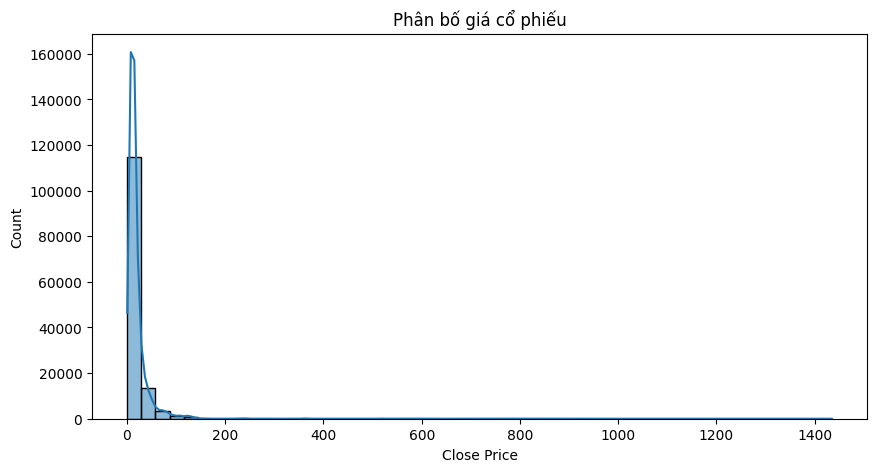

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(his_cost['closing_price'].dropna(), bins=50, kde=True)
plt.title("Phân bố giá cổ phiếu")
plt.xlabel("Close Price")
plt.show()

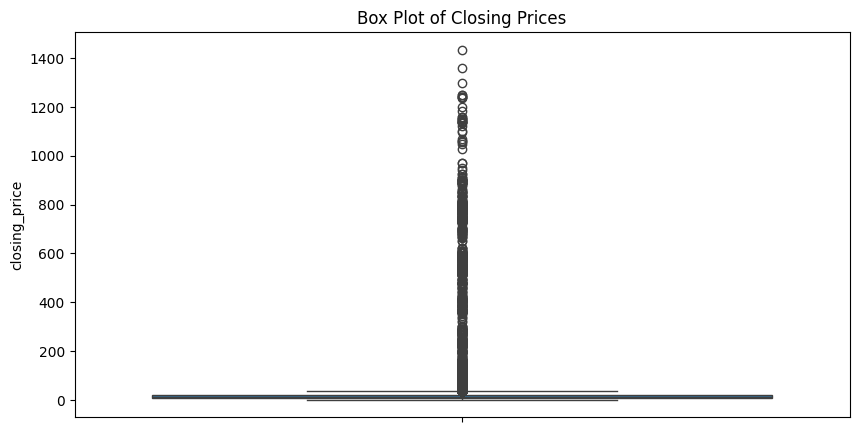

In [198]:
plt.figure(figsize=(10,5))
sns.boxplot(his_cost['closing_price'])
plt.title('Box Plot of Closing Prices')
plt.show()

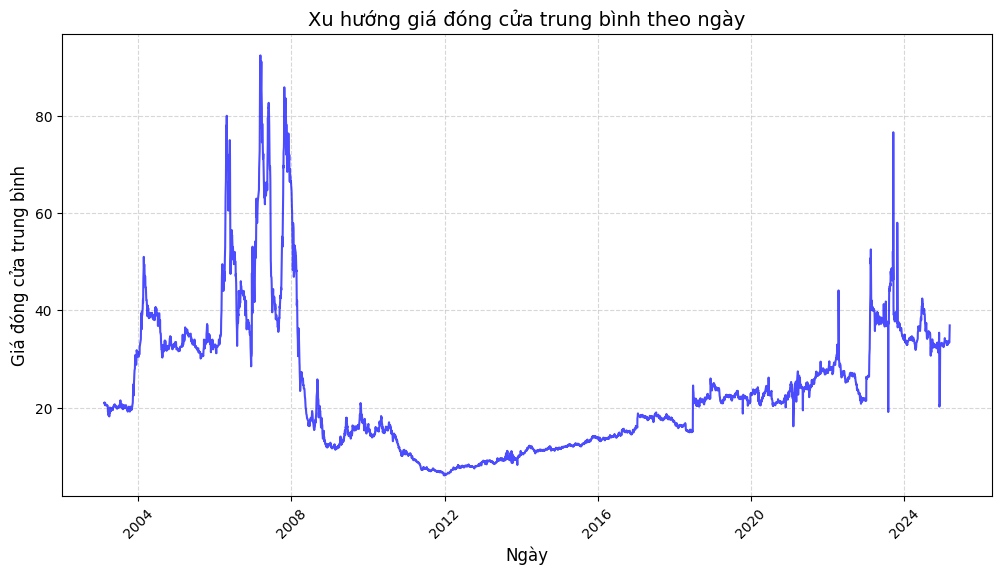

In [199]:
df_grouped = his_cost.groupby("transaction_date")["closing_price"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng giá đóng cửa trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Giá đóng cửa trung bình", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

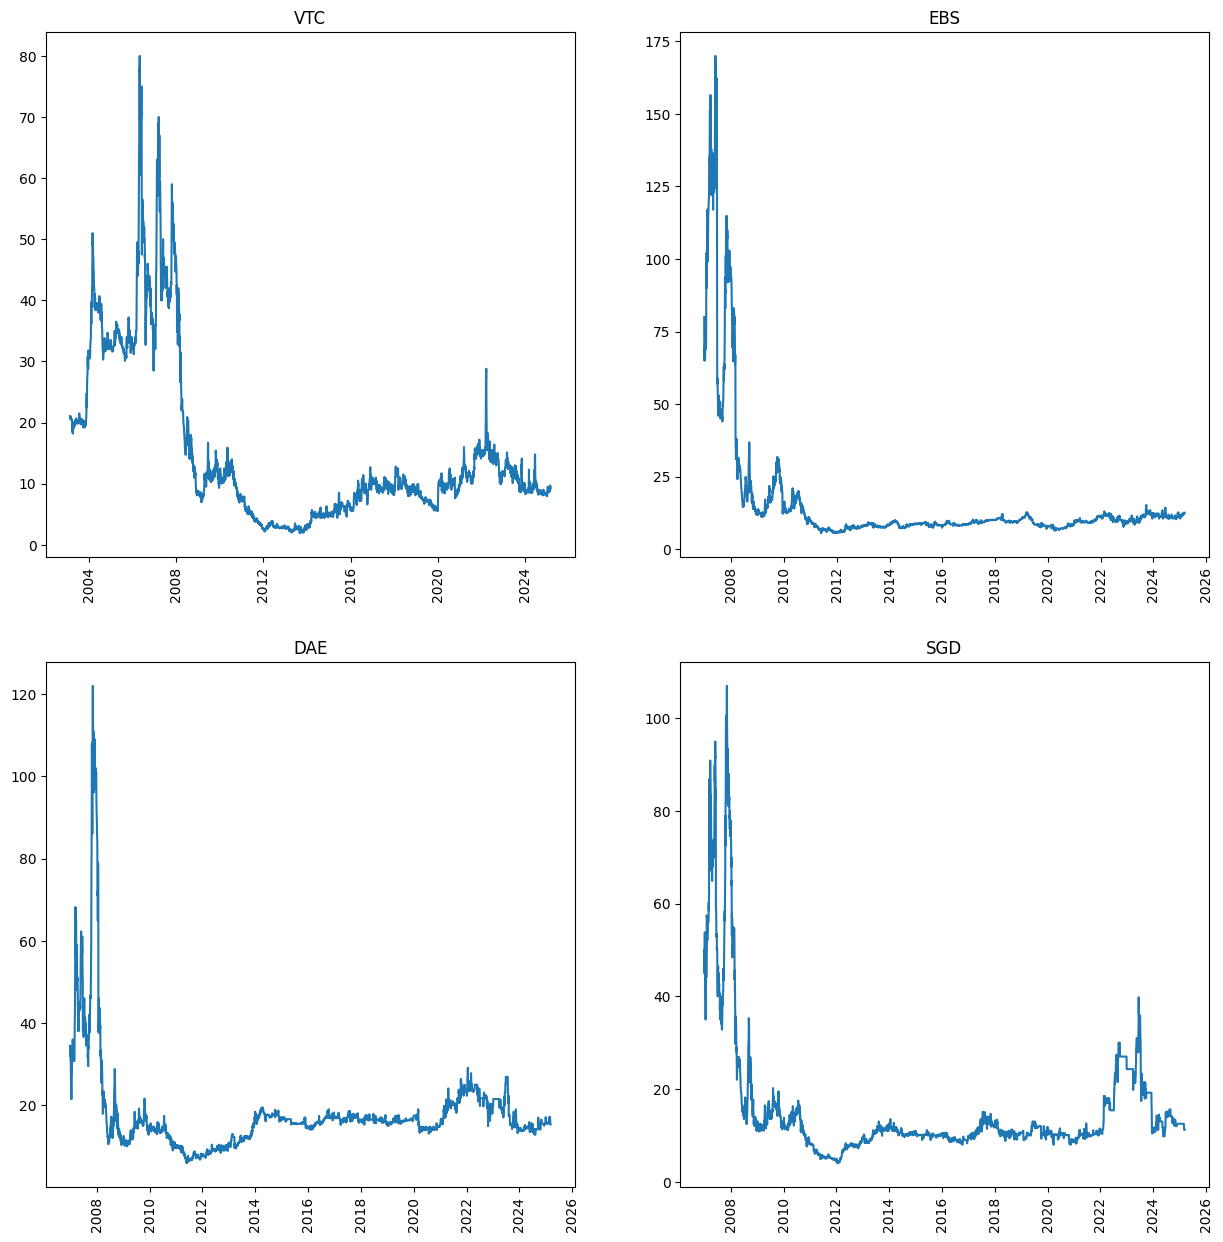

In [200]:
# Chọn 5 mã ngẫu nhiên để phân tích xu hướng giá
stocks = his_cost['stock_code'].value_counts().index[:4]

plt.figure(figsize=(15, 15))
for i, stock in enumerate(stocks, 1):
    plt.subplot(2,2,i)
    plt.title(stock)
    subset = his_cost[his_cost['stock_code'] == stock]
    plt.plot(subset['transaction_date'], subset['closing_price'], label=stock)
    plt.xticks(rotation="vertical")

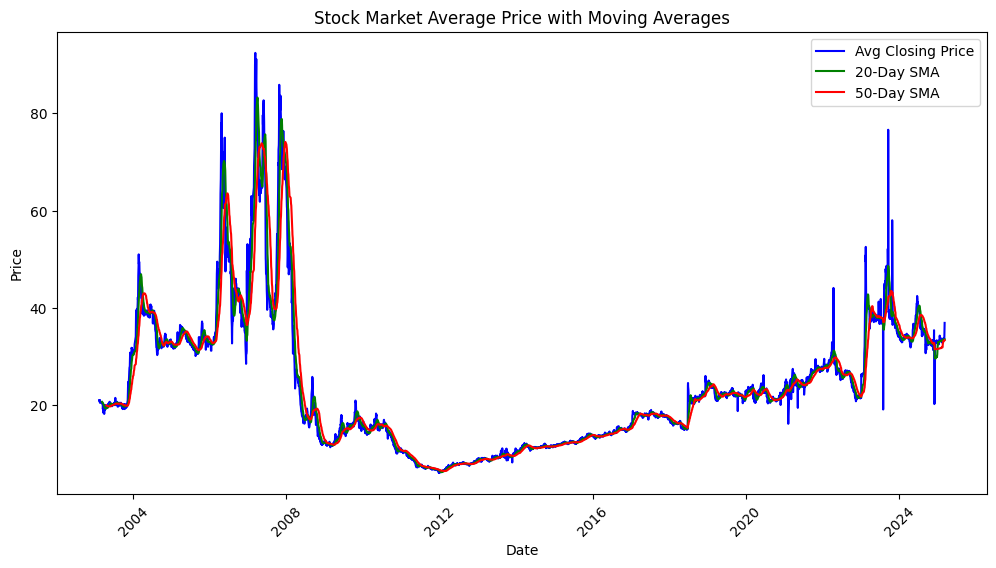

In [219]:
# Gom nhóm theo ngày, tính trung bình giá đóng cửa
df_grouped = his_cost.groupby('transaction_date')['closing_price'].mean().reset_index()

# Sắp xếp theo ngày
df_grouped = df_grouped.sort_values(by='transaction_date')

# Tính SMA
df_grouped['SMA_20'] = df_grouped['closing_price'].rolling(window=20).mean()
df_grouped['SMA_50'] = df_grouped['closing_price'].rolling(window=50).mean()

# Đặt Date làm index
df_grouped.set_index('transaction_date', inplace=True)

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(df_grouped.index, df_grouped['closing_price'], label="Avg Closing Price", color='blue')
plt.plot(df_grouped.index, df_grouped['SMA_20'], label="20-Day SMA", color='green')
plt.plot(df_grouped.index, df_grouped['SMA_50'], label="50-Day SMA", color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Market Average Price with Moving Averages')
plt.legend()
plt.xticks(rotation=45)  # Xoay trục X cho dễ đọc
plt.show()

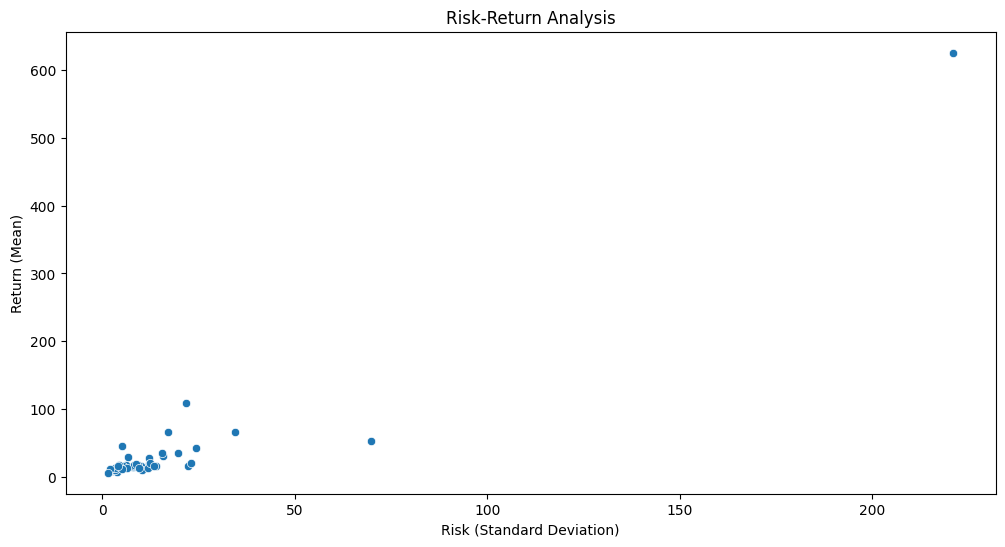

In [214]:
# Tính toán lợi nhuận và rủi ro
risk_return = his_cost.groupby('stock_code')['closing_price'].agg(['mean', 'std'])
risk_return.columns = ['return', 'risk']

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=risk_return, x='risk', y='return')
plt.title('Risk-Return Analysis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return (Mean)')
plt.show()

In [201]:
his_cost.columns

Index(['stock_code', 'transaction_date', 'closing_price', 'change_hisCost',
       'matched_volume', 'matched_value', 'negotiated_volume',
       'negotiated_value', 'opening_price', 'highest_price', 'lowest_price'],
      dtype='object')

In [ ]:
his_cost['year'] = his_cost['transaction_date'].dt.year
his_cost['month'] = his_cost['transaction_date'].dt.month
his_cost['quarter'] = his_cost['transaction_date'].dt.quarter

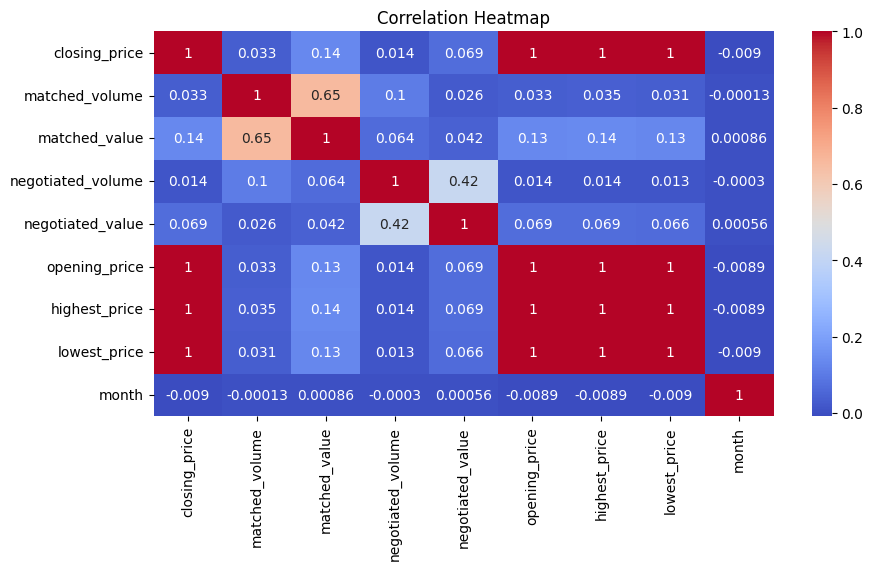

In [204]:
plt.figure(figsize=(10,5))
sns.heatmap(his_cost[['closing_price',
       'matched_volume', 'matched_value', 'negotiated_volume',
       'negotiated_value', 'opening_price', 'highest_price', 'lowest_price',
       'month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [170]:
his_cost.groupby('stock_code')['matched_volume'].sum().nlargest(5)


stock_code
DST    1.561886e+09
VGI    1.184806e+09
YEG    8.138873e+08
CTR    7.045778e+08
VNB    2.198353e+08
Name: matched_volume, dtype: float64

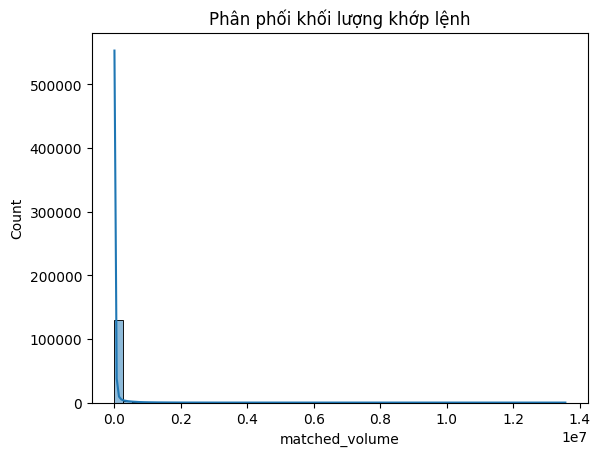

In [171]:
sns.histplot(his_cost['matched_volume'], bins=50, kde=True)
plt.title("Phân phối khối lượng khớp lệnh")
plt.show()


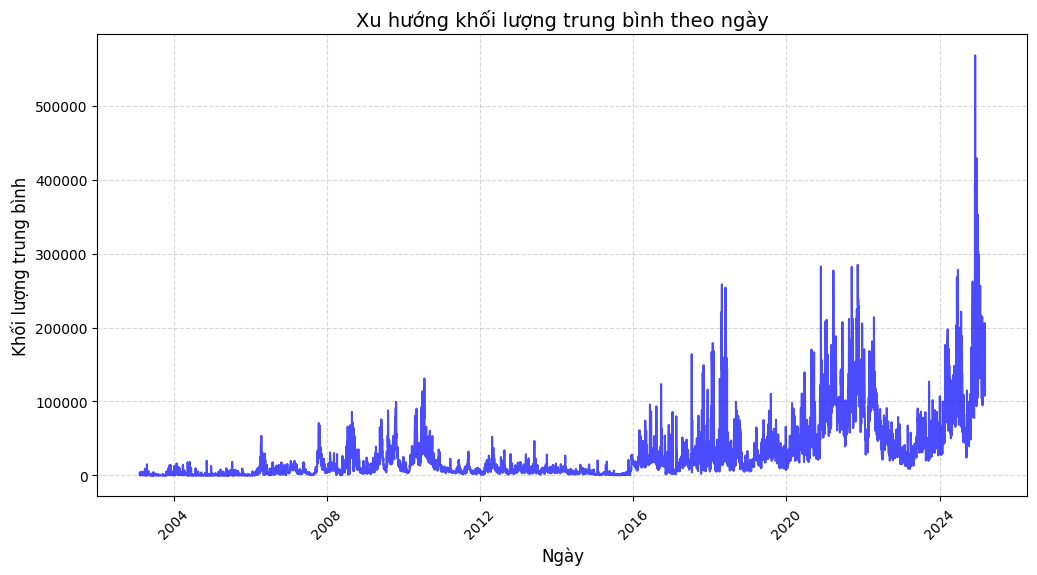

In [208]:
df_grouped = his_cost.groupby("transaction_date")["matched_volume"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng khối lượng trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Khối lượng trung bình", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Tương quan của các mã với nhau

In [158]:
pivot_table = his_cost.pivot_table(index='transaction_date', columns='stock_code', values='closing_price')

In [159]:
correlation_matrix = pivot_table.corr()

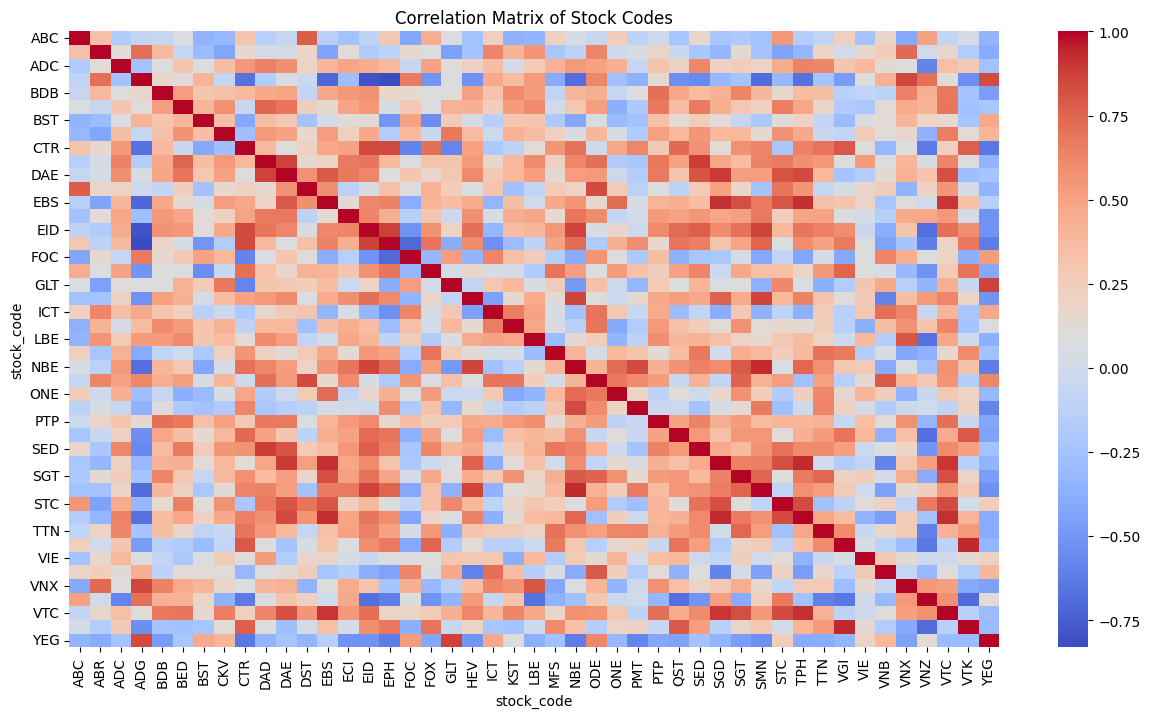

In [164]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Codes')
plt.show()

In [165]:
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1]  # Loại bỏ tương quan của chính nó
print(high_correlation_pairs.head(10))  # Top 10 cặp có tương quan cao nhất

stock_code  stock_code
VTK         VGI           0.936491
VGI         VTK           0.936491
SMN         NBE           0.933660
NBE         SMN           0.933660
TPH         SGD           0.932029
SGD         TPH           0.932029
TPH         EBS           0.924633
EBS         TPH           0.924633
VTC         TPH           0.919450
TPH         VTC           0.919450
dtype: float64
